<a href="https://colab.research.google.com/github/suphaporn7041/Data-analyst/blob/main/BankChurners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Analytic from Bank Churners

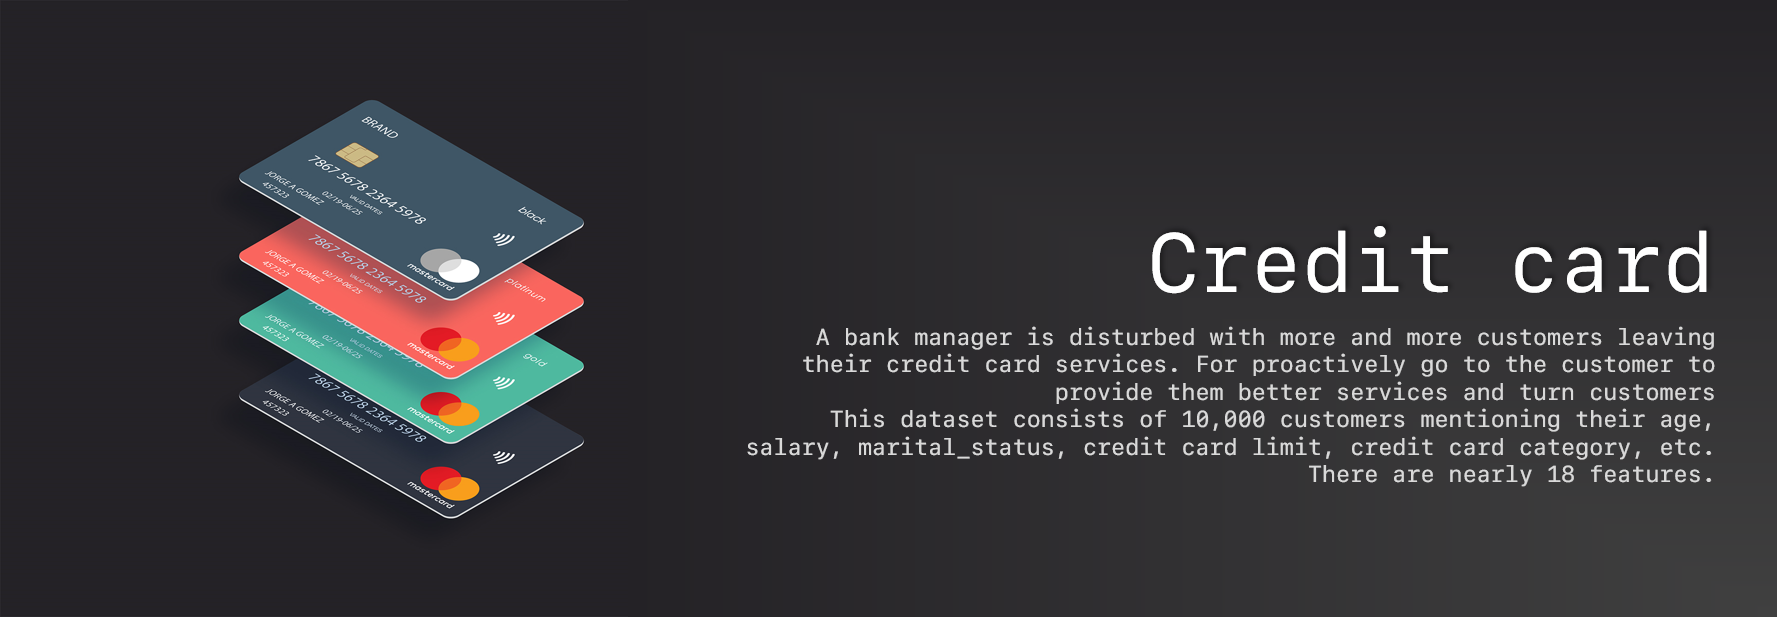

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.style.use('seaborn-darkgrid')

**About features in data**

*  CLIENTNUM : Client number Unique identifier for the customer holding the account
*  Attrition_Flag : Internal event (customer activity) variable - if the account is closed then 1 else 0
*  Customer_Age : Demographic variable - Customer's Age in Years
*  Gender : Demographic variable - M=Male, F=Female
*  Dependent_count : Demographic variable - Number of dependents
*  Education_Level : Demographic variable - Educational Qualification of the *  *  account holder (example: high school, college graduate, etc.)
*  Marital_Status : Demographic variable - Married, Single, Divorced, Unknown
*  Income_Category : Demographic variable - Annual Income Category of the account holder (< 40K, 40K - 60K, 60K - 80K, 80K-120K, >)
*  Card_Category : Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
*  Months_on_book : Period of relationship with bank
*  Total_Relationship_Count : Total no. of products held by the customer
*  Months_Inactive_12_mon : No. of months inactive in the last 12 months
*  Contacts_Count_12_mon : No. of Contacts in the last 12 months
*  Credit_Limit : Credit Limit on the Credit Card
*  Total_Revolving_Bal : Total Revolving Balance on the Credit Card
*  Avg_Open_To_Buy : Open to Buy Credit Line (Average of last 12 months)
*  Total_Amt_Chng_Q4_Q1 : Change in Transaction Amount (Q4 over Q1)
*  Total_Trans_Amt : Total Transaction Amount (Last 12 months)
*  Total_Trans_Ct : Total Transaction Count (Last 12 months)
*  Total_Ct_Chng_Q4_Q1 : Change in Transaction Count (Q4 over Q1)
*  Avg_Utilization_Ratio : Average Card Utilization Ratio

# Explore data Analysis

## Prepareing data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebook/Kaggle/BankChurners.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [ ]:
df_numerical = df[['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
                  'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Trans_Amt']]

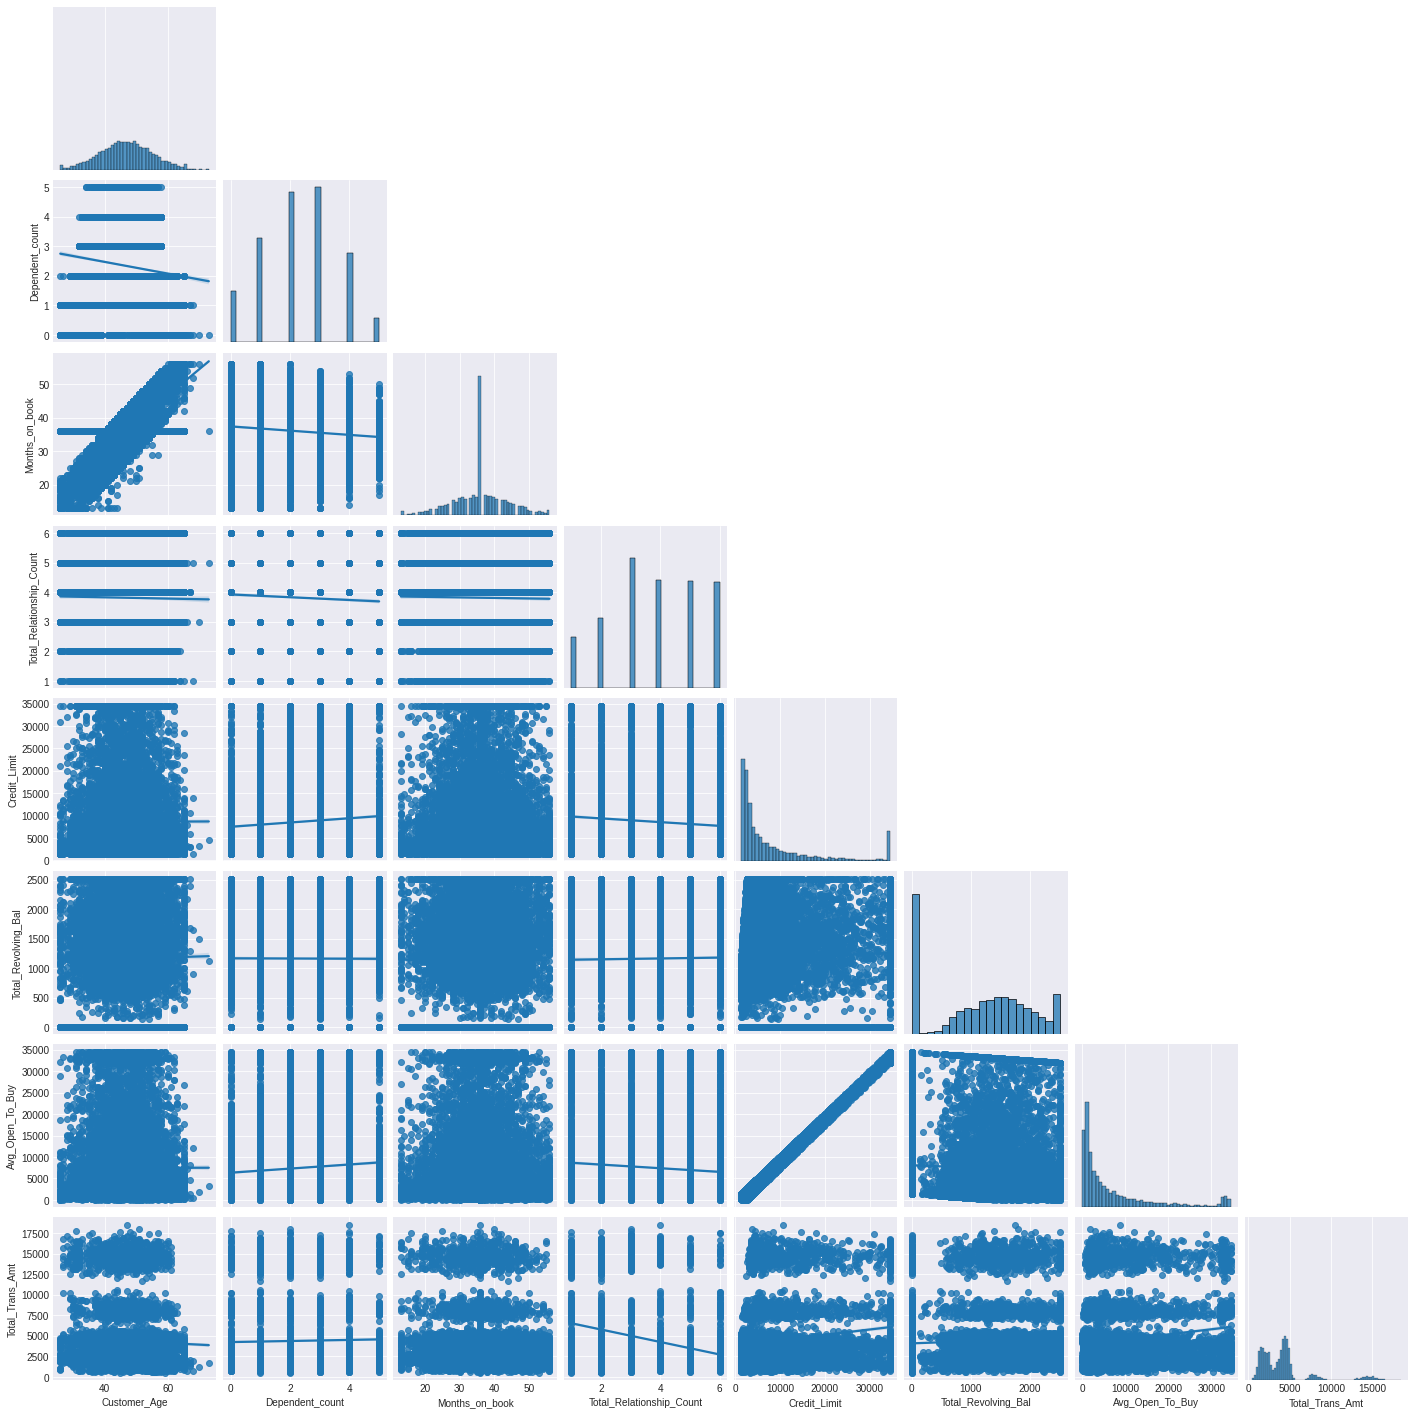

In [ ]:
sns.pairplot(df_numerical, kind='reg', corner=True,)

In [ ]:
df.shape

(10127, 23)

In [ ]:
df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
        inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [ ]:
df["Gender"].astype("category")

0        M
1        F
2        M
3        F
4        M
        ..
10122    M
10123    M
10124    F
10125    M
10126    F
Name: Gender, Length: 10127, dtype: category
Categories (2, object): ['F', 'M']

## Categorical data

**manipulation catagorical feature**

In [ ]:
df.Income_Category.unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [ ]:
order_income = ['Unknown','Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +']

In [ ]:
df.Education_Level.unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [ ]:
order_edu = ['Unknown','Uneducated','High School','Graduate','Post-Graduate','Doctorate']

**Plotting**

*  Countplot : counts of observations in each categorical feature using bars.
*  Violinplot : combination of boxplot and kernel density estimate.
*  Boxenplot : show an enhanced box plot for our larger datasets.

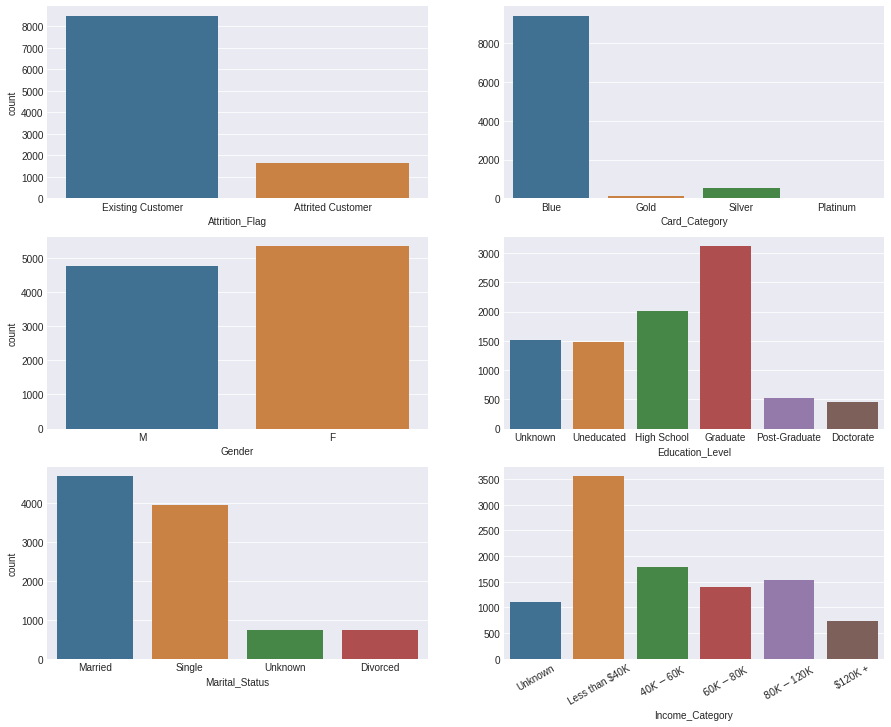

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

ax1 = sns.countplot(ax=axes[0, 0], data=df, x = df['Attrition_Flag'], saturation = 0.55)
ax2 = sns.countplot(ax=axes[0, 1], data=df, x = df['Card_Category'], saturation = 0.55)
ax3 = sns.countplot(ax=axes[1, 0], data=df, x = df['Gender'], saturation = 0.55)
ax4 = sns.countplot(ax=axes[1, 1], data=df, x = df['Education_Level'], saturation = 0.55, order=order_edu)
ax5 = sns.countplot(ax=axes[2, 0], data=df, x = df['Marital_Status'], saturation = 0.55)
ax6 = sns.countplot(ax=axes[2, 1], data=df, x = df['Income_Category'], saturation = 0.55, order=order_income)

plt.xticks(rotation=30)
ax2.axes.yaxis.label.set_visible(False)
ax4.axes.yaxis.label.set_visible(False)
ax6.axes.yaxis.label.set_visible(False)

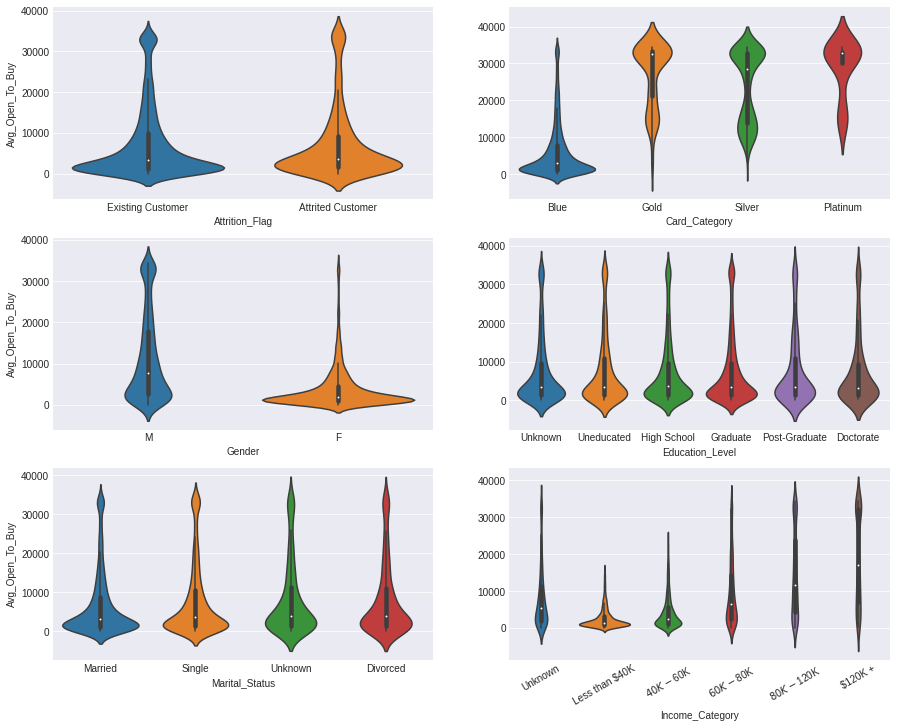

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

ax1 = sns.violinplot(ax=axes[0, 0], data=df, x = df['Attrition_Flag'], y=df['Avg_Open_To_Buy'])
ax2 = sns.violinplot(ax=axes[0, 1], data=df, x = df['Card_Category'], y=df['Avg_Open_To_Buy'])
ax3 = sns.violinplot(ax=axes[1, 0], data=df, x = df['Gender'], y=df['Avg_Open_To_Buy'])
ax4 = sns.violinplot(ax=axes[1, 1], data=df, x = df['Education_Level'], y=df['Avg_Open_To_Buy'], order=order_edu)
ax5 = sns.violinplot(ax=axes[2, 0], data=df, x = df['Marital_Status'], y=df['Avg_Open_To_Buy'])
ax6 = sns.violinplot(ax=axes[2, 1], data=df, x = df['Income_Category'], y=df['Avg_Open_To_Buy'], order=order_income)

plt.xticks(rotation=30)
ax2.axes.yaxis.label.set_visible(False)
ax4.axes.yaxis.label.set_visible(False)
ax6.axes.yaxis.label.set_visible(False)

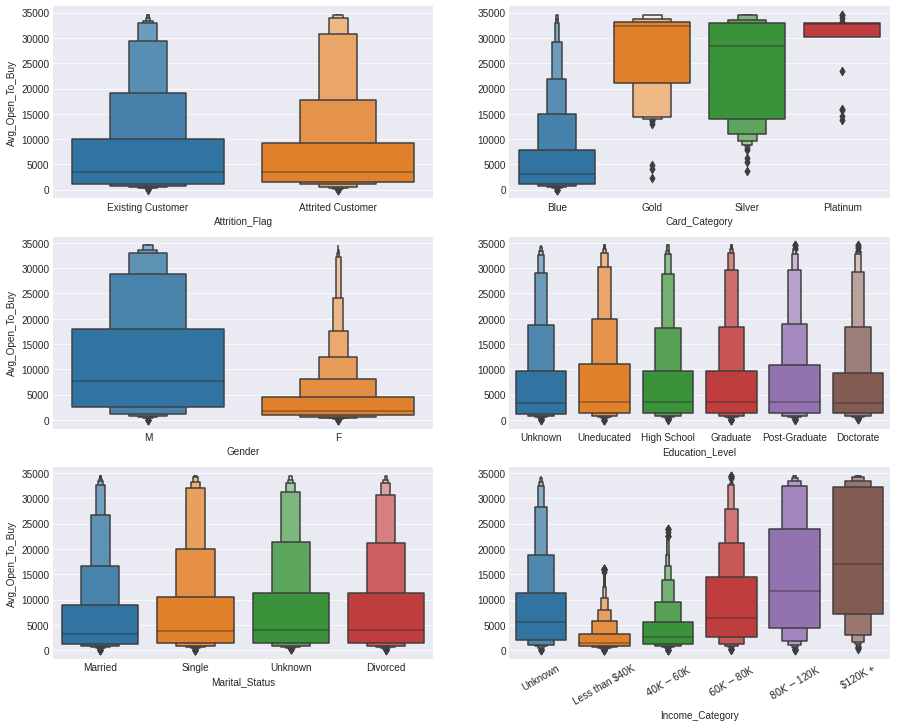

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

ax1 = sns.boxenplot(ax=axes[0, 0], data=df, x = df['Attrition_Flag'], y=df['Avg_Open_To_Buy'])
ax2 = sns.boxenplot(ax=axes[0, 1], data=df, x = df['Card_Category'], y=df['Avg_Open_To_Buy'])
ax3 = sns.boxenplot(ax=axes[1, 0], data=df, x = df['Gender'], y=df['Avg_Open_To_Buy'])
ax4 = sns.boxenplot(ax=axes[1, 1], data=df, x = df['Education_Level'], y=df['Avg_Open_To_Buy'], order=order_edu)
ax5 = sns.boxenplot(ax=axes[2, 0], data=df, x = df['Marital_Status'], y=df['Avg_Open_To_Buy'])
ax6 = sns.boxenplot(ax=axes[2, 1], data=df, x = df['Income_Category'], y=df['Avg_Open_To_Buy'], order=order_income)

plt.xticks(rotation=30)
ax2.axes.yaxis.label.set_visible(False)
ax4.axes.yaxis.label.set_visible(False)
ax6.axes.yaxis.label.set_visible(False)

**Conclusion**

*  According to the countplot in bar chart format, most of the clients hold a blue card, with the same number of genders for both men and women. and is often married but earns less than 40k Dollars

*  But in terms of Average open to buy, the silver card, gold card, and platinum card clientele is significantly higher than the blue card, although the blue card volume is larger in range 30k-40k.

*  Education level and marital status did not have much effect.
*  For females the average open to buy is around 1000-5000 Dollars, but for males there is a 30k avg group which is the interesting part.


## Viewpoint 1 : Customer's age

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


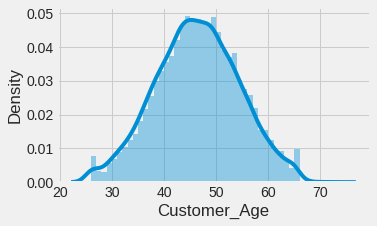

In [ ]:
plt.figure(figsize=(5, 3))
sns.distplot(df['Customer_Age'])

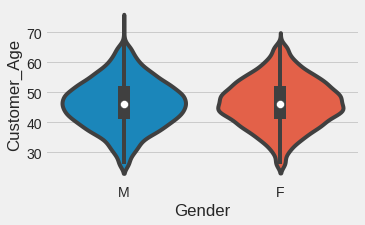

In [ ]:
plt.figure(figsize=(5, 3))
sns.violinplot(x=df["Gender"], y=df["Customer_Age"])

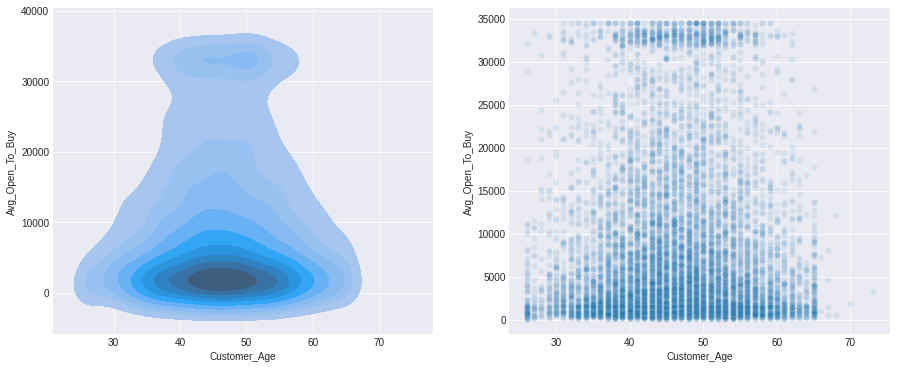

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

_ = sns.kdeplot(ax=axes[0], data = df, x='Customer_Age', y='Avg_Open_To_Buy', fill=True)
_ = sns.scatterplot(ax = axes[1], data = df, x='Customer_Age', y='Avg_Open_To_Buy',alpha=0.1)

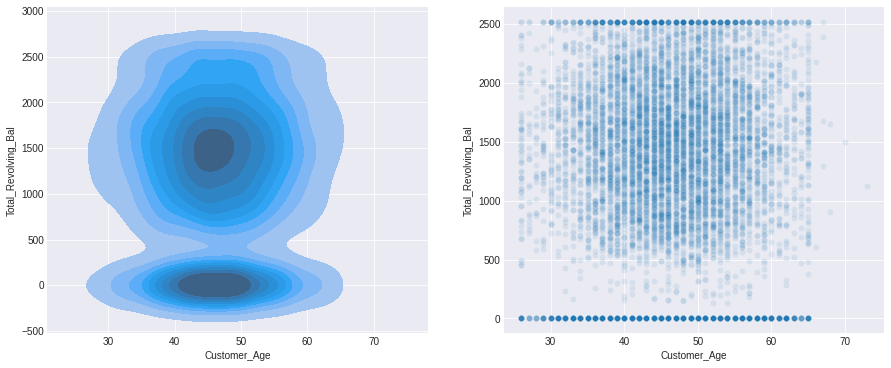

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.kdeplot(ax=axes[0], data = df, x='Customer_Age', y='Total_Revolving_Bal',fill=True)
sns.scatterplot(ax=axes[1], data = df, x='Customer_Age', y='Total_Revolving_Bal',alpha=0.1)

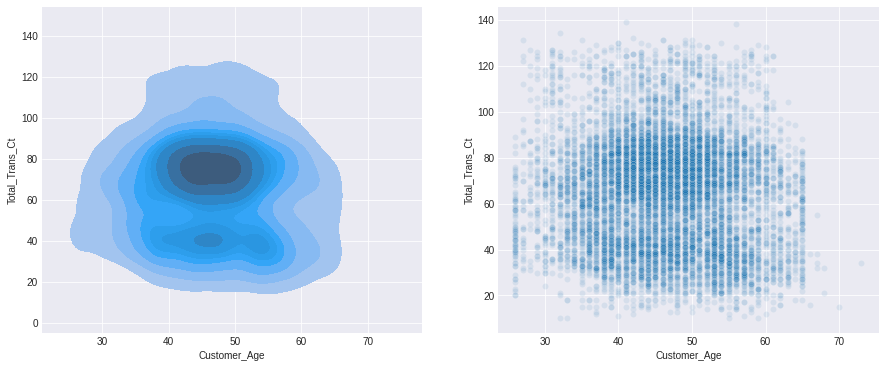

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.kdeplot(ax=axes[0], data = df, x='Customer_Age', y='Total_Trans_Ct',fill=True)
sns.scatterplot(ax=axes[1], data = df, x='Customer_Age', y='Total_Trans_Ct',alpha=0.1)

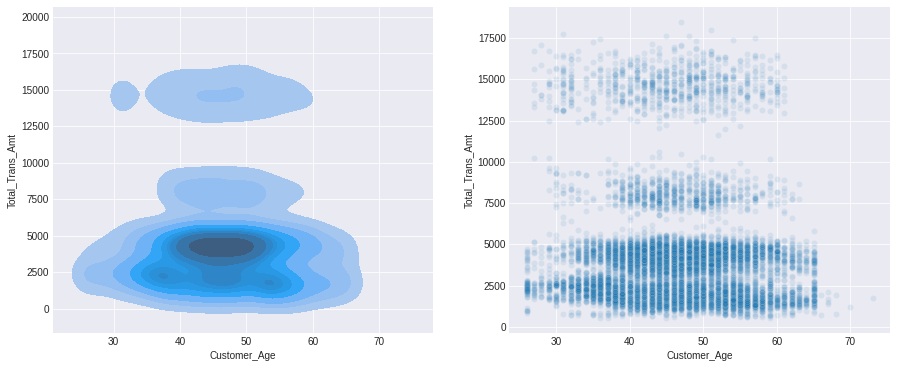

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.kdeplot(ax=axes[0], data = df, x='Customer_Age', y='Total_Trans_Amt',fill=True)
sns.scatterplot(ax=axes[1], data = df, x='Customer_Age', y='Total_Trans_Amt',alpha=0.1)

**Observation:**

*  The age range is mostly around 40-50 years in both female and male.
*  The average open to buy spread is quite high in the 30-60 years but still in the range below 10000.
*  As for other data such as Total Revolving Balance, Total Transit Count, the age range is still clustered at 40-50 years.

## Viewpoint 2 : Customers who spend the most money on average

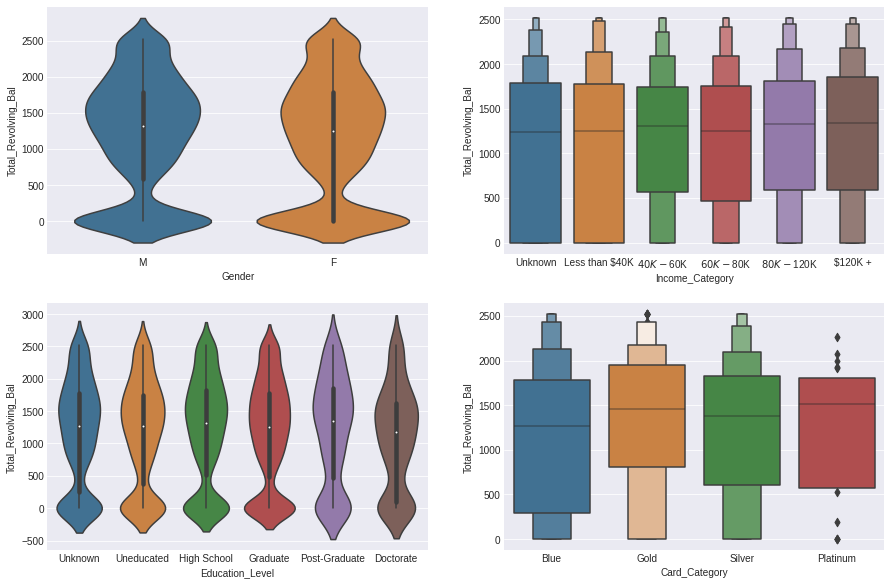

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

_ = sns.violinplot(ax=axes[0, 0], data= df, x=df.Gender, y=df.Total_Revolving_Bal, saturation= 0.55)
_ = sns.violinplot(ax=axes[1, 0], data= df, x=df.Education_Level, y=df.Total_Revolving_Bal, saturation= 0.55,
            order=order_edu)
_ = sns.boxenplot(ax=axes[0, 1], data= df, x=df.Income_Category, y=df.Total_Revolving_Bal, saturation= 0.55,
            order=['Unknown','Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +'])
_ = sns.boxenplot(ax=axes[1, 1], data= df, x=df.Card_Category, y=df.Total_Revolving_Bal, saturation= 0.55)


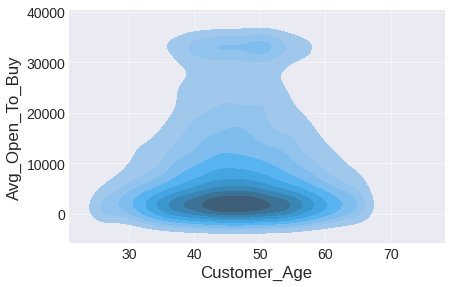

In [ ]:
sns.kdeplot(x=df.Customer_Age, y=df.Avg_Open_To_Buy, fill=True, hue=None)

**Now we assume that**
*  customer who has income range of 60k above have relatively high spending averages. 
*  Range of age still in 40-50 years old.
*  The education level had almost no effect.

In [ ]:
df_high = df.loc[df.Avg_Open_To_Buy > 10000 , ['Income_Category','Customer_Age','Dependent_count','Education_Level','Card_Category',
   'Months_on_book','Total_Relationship_Count','Total_Revolving_Bal','Avg_Open_To_Buy']]

df_high.head()

,Income_Category,Customer_Age,Dependent_count,Education_Level,Card_Category,Months_on_book,Total_Relationship_Count,Total_Revolving_Bal,Avg_Open_To_Buy
0,$60K - $80K,45,3,High School,Blue,39,5,777,11914.0
6,$120K +,51,4,Unknown,Gold,46,6,2264,32252.0
7,$60K - $80K,32,0,High School,Silver,27,2,1396,27685.0
8,$60K - $80K,37,3,Uneducated,Blue,36,5,2517,19835.0
12,$80K - $120K,56,1,College,Blue,36,3,0,11751.0


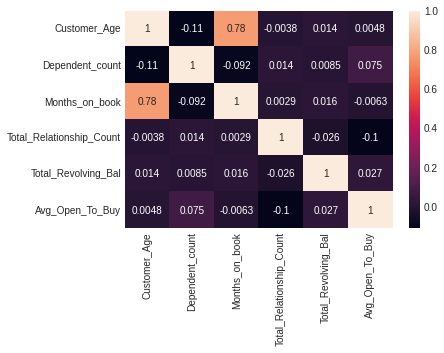

In [ ]:
sns.heatmap(df_high.corr(), annot=True)

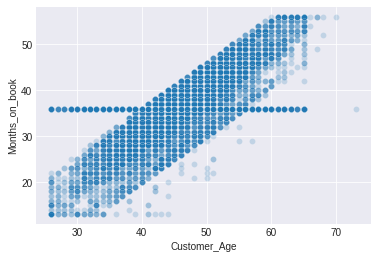

In [ ]:
sns.scatterplot(data= df, x='Customer_Age', y='Months_on_book', alpha= 0.2)

**Observation:**

Older customers are more likely to months on book to contact the bank.

In [ ]:
order_income = ['Unknown','Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +']

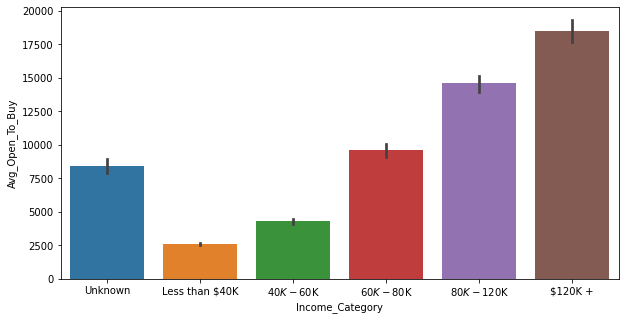

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=df.Income_Category, y=df.Avg_Open_To_Buy, data=df, order= order_income)

In [ ]:
df.Income_Category.value_counts(sort=order_income)

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [ ]:
df_high['Income_Category'].value_counts(normalize=True, sort=order_income)

$80K - $120K      0.342548
$60K - $80K       0.203926
$120K +           0.193109
Unknown           0.130208
$40K - $60K       0.082532
Less than $40K    0.047676
Name: Income_Category, dtype: float64

In [ ]:
order_edu = ['Unknown', 'Uneducated', 'High School', 'Post-Graduate', 'Graduate', 'College', 'Doctorate']

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 36.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.0% of the points cannot be placed; yo

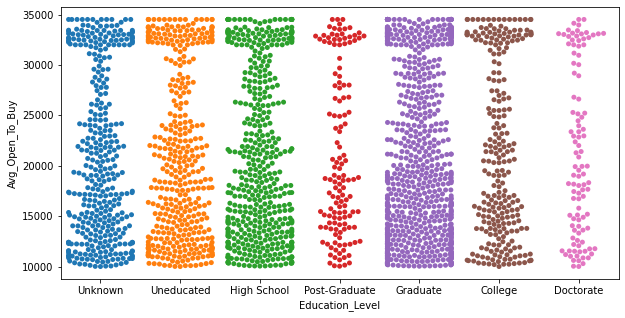

In [ ]:
plt.figure(figsize=(10,5))
sns.swarmplot(x='Education_Level', y='Avg_Open_To_Buy', data=df_high, order = order_edu)

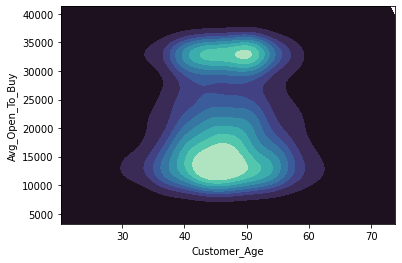

In [ ]:
sns.kdeplot(x='Customer_Age', y='Avg_Open_To_Buy', data=df_high, fill=True, hue=None, thresh=0, levels=10, cmap="mako")

Customers with high spending averages They are often high-income people.

Which there are 727 people from total or 19.3% from high-avg open to buy creditand Especially in the near 50s.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


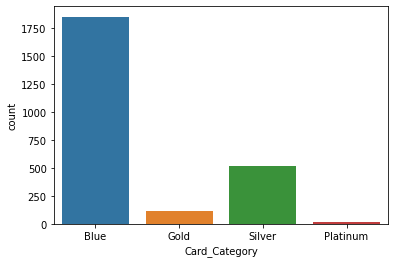

In [ ]:
sns.countplot(df_high.Card_Category)

In [ ]:
df_high['Card_Category'].value_counts(normalize=True)

Blue        0.741186
Silver      0.205529
Gold        0.045272
Platinum    0.008013
Name: Card_Category, dtype: float64

But this group of high spending customers returning to a Blue card 74.1% 

Therefore, we shuld offer them a Gold or Platinum card.

In [ ]:
df["Gender"].astype("category")

0        M
1        F
2        M
3        F
4        M
        ..
10122    M
10123    M
10124    F
10125    M
10126    F
Name: Gender, Length: 10127, dtype: category
Categories (2, object): ['F', 'M']

## Viewpoint 3 : Low total revolving balance customers

In [ ]:
df_low_sp = df.loc[df['Total_Revolving_Bal']==0, 
       ['Total_Revolving_Bal','Customer_Age','Gender','Education_Level','Income_Category',
        'Months_on_book','Total_Relationship_Count','Card_Category','Marital_Status', 'Dependent_count']]
df_low_sp.head()

,Total_Revolving_Bal,Customer_Age,Gender,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Card_Category,Marital_Status,Dependent_count
2,0,51,M,Graduate,$80K - $120K,36,4,Blue,Married,3
4,0,40,M,Uneducated,$60K - $80K,21,5,Blue,Married,3
12,0,56,M,College,$80K - $120K,36,3,Blue,Single,1
21,0,62,F,Graduate,Less than $40K,49,2,Blue,Married,0
24,0,54,M,Unknown,$80K - $120K,42,4,Blue,Married,2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


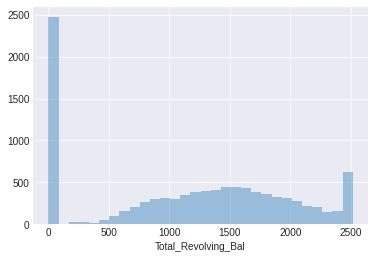

In [ ]:
sns.distplot(df.Total_Revolving_Bal,hist=True,kde=False, bins=30)

In [ ]:
df.loc[df['Total_Revolving_Bal']==0].count()["CLIENTNUM"]

2470

In [ ]:
df.loc[df['Total_Revolving_Bal']==0]['Card_Category'].value_counts()

Blue        2323
Silver       125
Gold          19
Platinum       3
Name: Card_Category, dtype: int64

In [ ]:
df.loc[df['Total_Revolving_Bal']==0]['Income_Category'].value_counts()

Less than $40K    899
$40K - $60K       420
$80K - $120K      344
$60K - $80K       340
Unknown           303
$120K +           164
Name: Income_Category, dtype: int64

**Observation:**

There are 2470 accounts with Total Revolving Balance of 0, comprising 2323 Blue card customers, 125 Silver, 19 Gold, and 3 Platinum card.


Almost has income less than 40k Dollars.

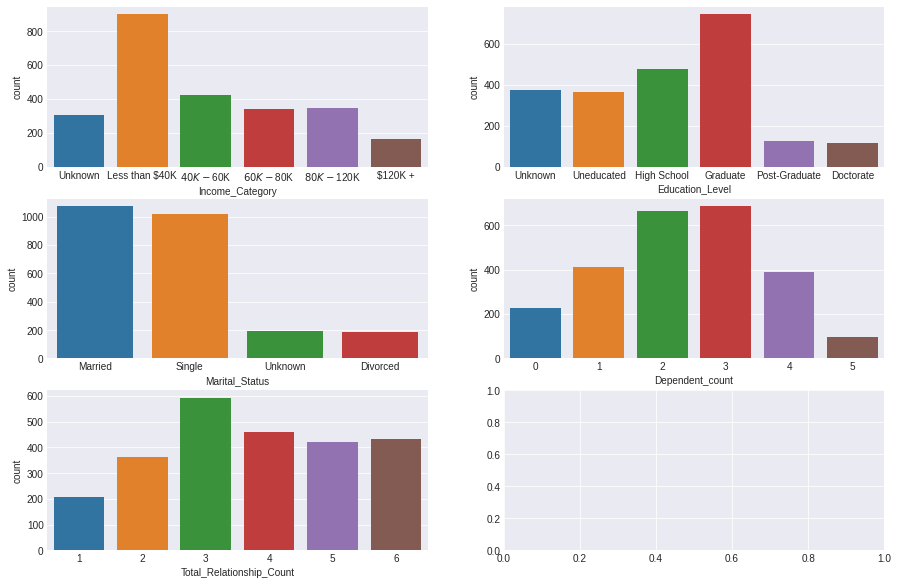

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

_ = sns.countplot(ax=axes[0,0], data = df_low_sp, x='Income_Category', order=order_income)
_ = sns.countplot(ax=axes[0,1], data = df_low_sp, x='Education_Level', order=order_edu)
_ = sns.countplot(ax=axes[1,0], data = df_low_sp, x='Marital_Status')
_ = sns.countplot(ax=axes[1,1], data = df_low_sp, x='Dependent_count')
_ = sns.countplot(ax=axes[2,0], data = df_low_sp, x='Total_Relationship_Count')

## Viewpoint 4 : High Income customer

### Preparing data

Convert Income Category to Income value in order to find trend of data

In [ ]:
order_income

['Unknown',
 'Less than $40K',
 '$40K - $60K',
 '$60K - $80K',
 '$80K - $120K',
 '$120K +']

In [ ]:
df['Income_Category'].map({'Unknown': np.nan,
 'Less than $40K': 40,
 '$40K - $60K' : 50,
 '$60K - $80K': 70,
 '$80K - $120K': 100,
 '$120K +': 120})

0         70.0
1         40.0
2        100.0
3         40.0
4         70.0
         ...  
10122     50.0
10123     50.0
10124     40.0
10125     50.0
10126     40.0
Name: Income_Category, Length: 10127, dtype: float64

In [ ]:
df['Income_values'] = df['Income_Category'].map({'Unknown': np.nan,
                        'Less than $40K': 40,
                        '$40K - $60K' : 50,
                        '$60K - $80K': 70,
                        '$80K - $120K': 100,
                        '$120K +': 120})

df[['Income_Category','Income_values']].head()

,Income_Category,Income_values
0,$60K - $80K,70.0
1,Less than $40K,40.0
2,$80K - $120K,100.0
3,Less than $40K,40.0
4,$60K - $80K,70.0


### Relationship and observation of income

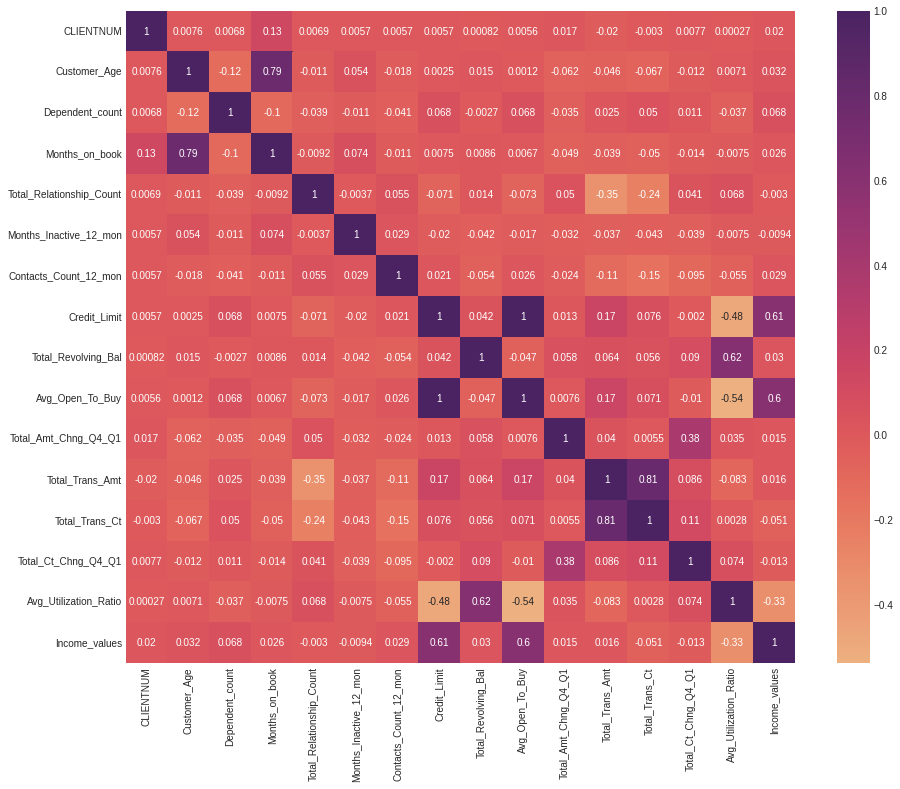

In [ ]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, cmap='flare')

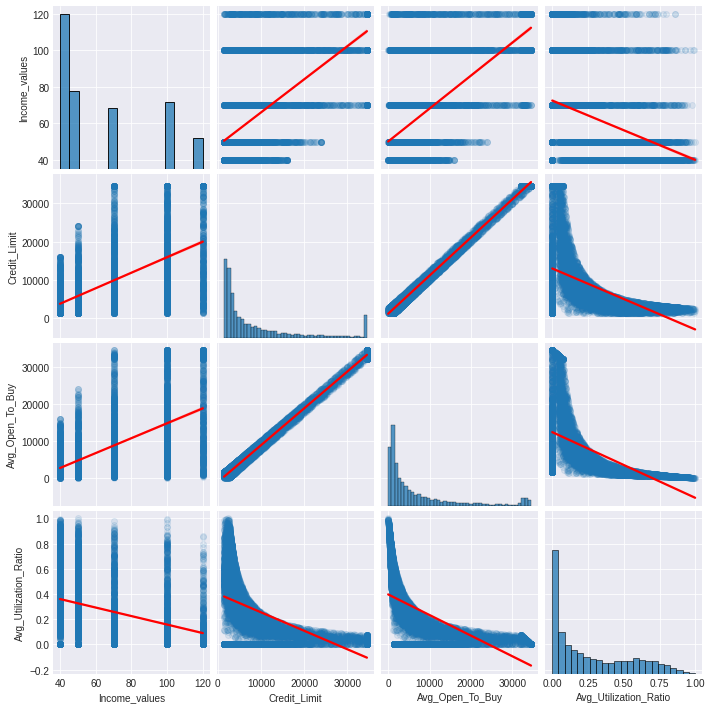

In [ ]:
sns.pairplot(data= df[['Income_values','Credit_Limit', 'Avg_Open_To_Buy', 'Avg_Utilization_Ratio']], 
             kind= 'reg',
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

**Observation:**

It can be seen that the higher the income value, the Credit limit and Average Open to buy. higher followed by correlation 0.6 score.

But the Avg_Utilization_Ratio score will decrease with correlation 0.3

We will consider clients earning more than $80k to be a high earning group.

In [ ]:
df_H_inc = df[df['Income_values'] >= 80]

In [ ]:
df_H_inc[['CLIENTNUM']].count()

CLIENTNUM    2262
dtype: int64

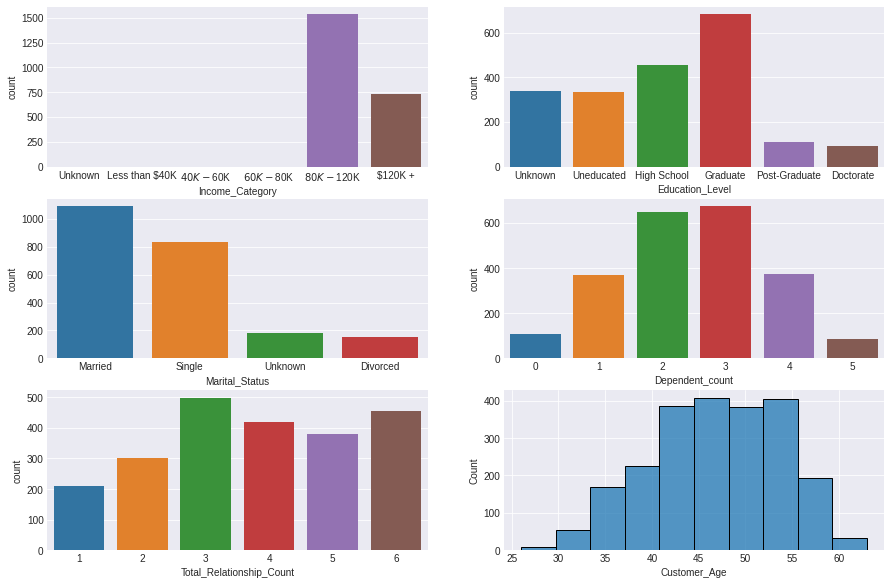

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

_ = sns.countplot(ax=axes[0,0], data = df_H_inc, x='Income_Category', order=order_income)
_ = sns.countplot(ax=axes[0,1], data = df_H_inc, x='Education_Level', order=order_edu)
_ = sns.countplot(ax=axes[1,0], data = df_H_inc, x='Marital_Status')
_ = sns.countplot(ax=axes[1,1], data = df_H_inc, x='Dependent_count')
_ = sns.countplot(ax=axes[2,0], data = df_H_inc, x='Total_Relationship_Count')
_ = sns.histplot(ax=axes[2,1], data = df_H_inc, x='Customer_Age', bins=10)